In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

if "notebooks" in os.getcwd():
    print("Running in Jupyter Notebook")

In [2]:
dataDir='data'
dataType='val2020'
annFile='{}/annotations/instances_attributes_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
shirt, blouse top, t-shirt, sweatshirt sweater cardigan jacket vest pants shorts skirt coat dress jumpsuit cape glasses hat headband, head covering, hair accessory tie glove watch belt leg warmer tights, stockings sock shoe bag, wallet scarf umbrella hood collar lapel epaulette sleeve pocket neckline buckle zipper applique bead bow flower fringe ribbon rivet ruffle sequin tassel

COCO supercategories: 
lowerbody head closures wholebody decorations waist garment parts legs and feet arms and hands upperbody others neck


In [5]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [6]:
img

{'id': 13414,
 'width': 731,
 'height': 1024,
 'file_name': '963999a4ce820148817057ade3cc956d.jpg',
 'license': 5,
 'time_captured': 'March-August, 2018',
 'original_url': 'http://farm4.staticflickr.com/3017/4606911785_1b81bb8dd8_n.jpg',
 'isstatic': 1,
 'kaggle_id': '963999a4ce820148817057ade3cc956d'}

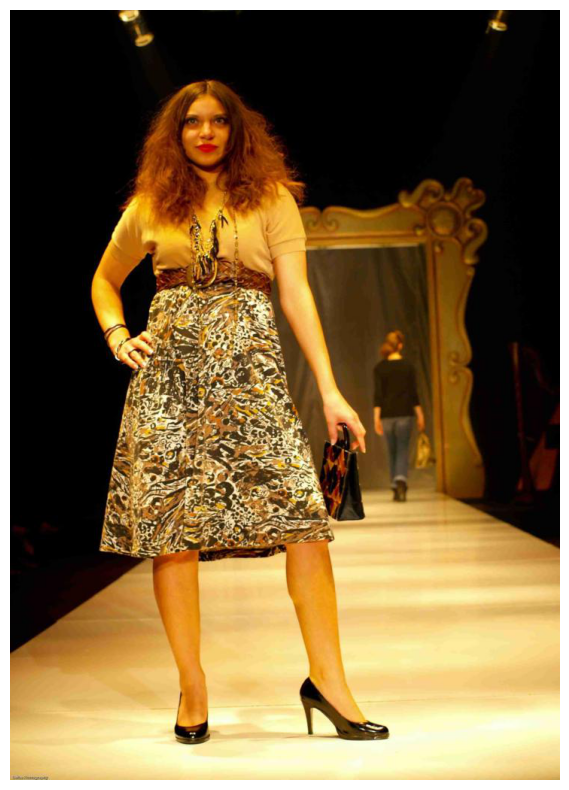

In [7]:
# load and display image
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
# I = io.imread(img['original_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

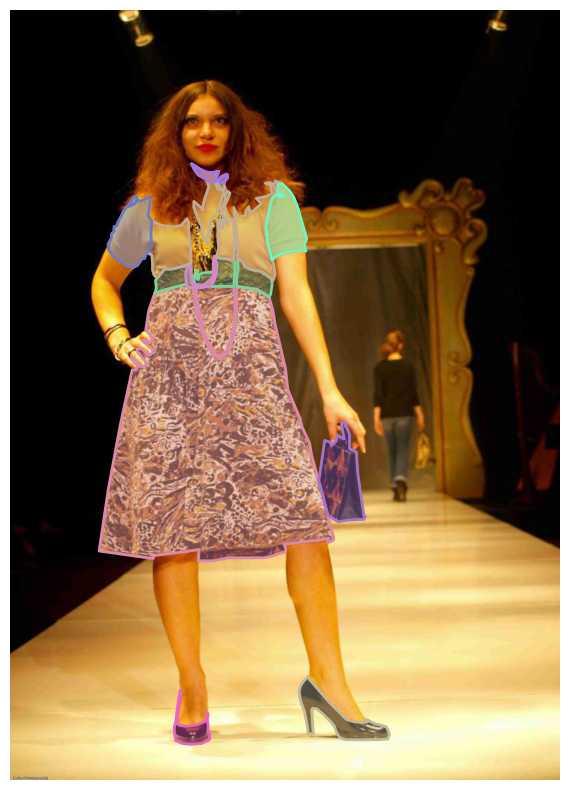

In [8]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [10]:
coco.loadCats(catIds)

[]

In [42]:
# # initialize COCO api for person keypoints annotations
# annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
# coco_kps=COCO(annFile)

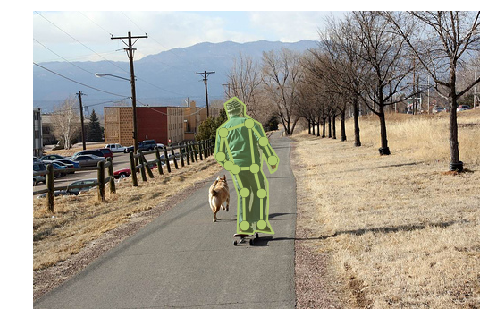

In [9]:
# load and display keypoints annotations
# plt.imshow(I); plt.axis('off')
# ax = plt.gca()
# annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
# anns = coco_kps.loadAnns(annIds)
# coco_kps.showAnns(anns)

In [10]:
# # initialize COCO api for caption annotations
# annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
# coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


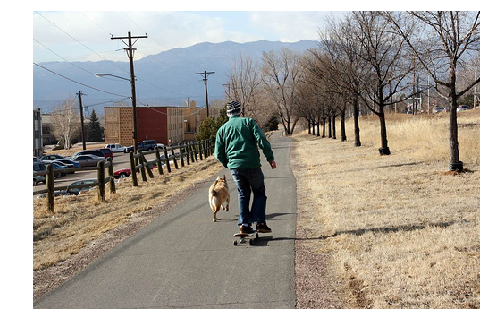

In [11]:
# # load and display caption annotations
# annIds = coco_caps.getAnnIds(imgIds=img['id']);
# anns = coco_caps.loadAnns(annIds)
# coco_caps.showAnns(anns)
# plt.imshow(I); plt.axis('off'); plt.show()